In [1]:
import pandas as pd

In [2]:
DATA_FOLDER = "audio_data"

In [3]:
df = pd.read_csv("audio_metadata.csv", index_col="id")
df.head(5)

,name,category,extension,file_path
id,,,,
1,50_Minutes-Colours,alternative,mp3,alternative/50_Minutes-Colours.mp3
2,50_Minutes-Nightwalk,alternative,mp3,alternative/50_Minutes-Nightwalk.mp3
3,50_Minutes-The_Great_Wall,alternative,mp3,alternative/50_Minutes-The_Great_Wall.mp3
4,Abigail_Lapell-Dress_Rehearsal,alternative,mp3,alternative/Abigail_Lapell-Dress_Rehearsal.mp3
5,Albino_Catfish-Ice_Cream,alternative,mp3,alternative/Albino_Catfish-Ice_Cream.mp3


## Analyse single audio file

In [82]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from itertools import cycle

matplotlib.use('Agg')

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

AUDIO_ID = 3

In [5]:
def get_audio(df, id):
    file_path = df.loc[id, 'file_path']
    audio_path = f"{DATA_FOLDER}/{file_path}"
    return ipd.Audio(filename=audio_path)

def display_audio(file):
    ipd.display(file)

### Play audio

In [6]:
audio = get_audio(df, AUDIO_ID)
display_audio(audio)

In [7]:
def load_audio(df, id):
    file_path = df.loc[id, 'file_path']
    audio_path = f"{DATA_FOLDER}/{file_path}"

    return librosa.load(audio_path)

### Basic informations about file

In [8]:
y, sr = load_audio(df, AUDIO_ID)
print(f"audio data (first 20): {y[:20]}")
print(f"audio data shape: {y.shape}")
print(f"sample rate: {sr}")

audio data (first 20): [ 3.5564881e-08 -1.5133992e-09  3.1082891e-08  4.6566129e-08
 -2.3166649e-08  2.0372681e-08  4.0396117e-08  4.4237822e-08
  4.5314664e-08  5.7043508e-08 -1.1612428e-07 -6.3242624e-08
 -3.5215635e-08 -4.1211024e-08 -2.9220246e-08  1.0698568e-07
  8.0384780e-08  5.8207661e-10  1.0011718e-08  7.2759576e-09]
audio data shape: (212280,)
sample rate: 22050


### Raw Audio

In [56]:
def plot_raw_audio(y):
    fig, ax = plt.subplots(figsize=(12, 5))
    pd.Series(y).plot(
        ax=ax,
        lw=1,
        title="Raw Audio",
        color=color_pal[0]
    )
    return fig

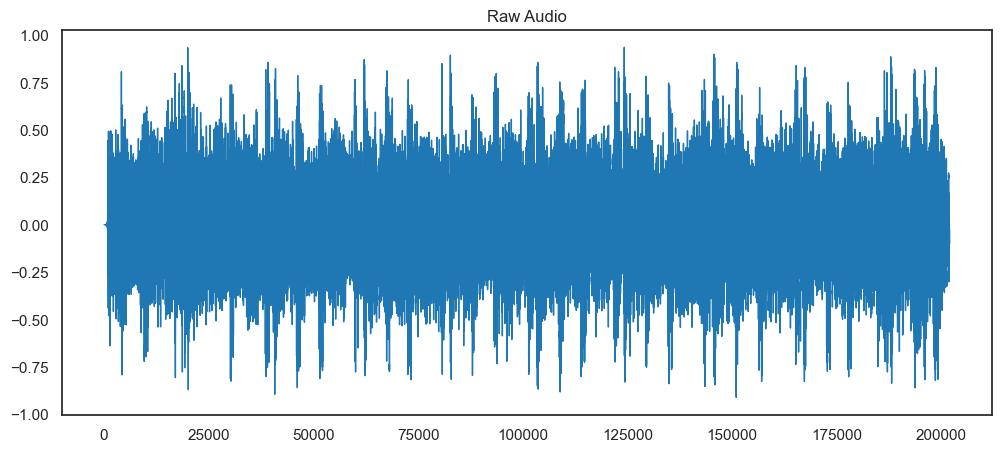

In [57]:
figure = plot_raw_audio(y)
plt.show()

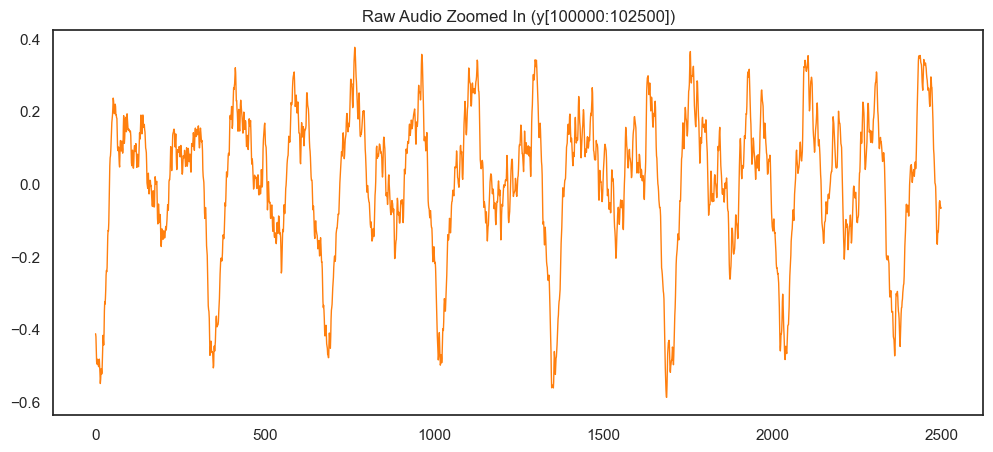

In [11]:
pd.Series(y[100000:102500]).plot(
    figsize=(12, 5),
    lw=1,
    title="Raw Audio Zoomed In (y[100000:102500])",
    color=color_pal[1]
)
plt.show()

### Basic audio data

In [12]:
# Get the duration in seconds
duration = librosa.get_duration(y=y, sr=sr)
print(f"Audio duration: {duration} seconds")

# Get the tempo (beats per minute)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo: {tempo} BPM")

Audio duration: 9.627210884353742 seconds
Tempo: 129.19921875 BPM


### Amplitude

In [58]:
def plot_amplitude(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Extract the amplitude
    magnitude_spec = librosa.amplitude_to_db(librosa.magphase(librosa.stft(y))[0])
    
    # Collapse the frequency dimension by taking the mean
    amplitude = magnitude_spec.mean(axis=0)
    
    # Calculate the time axis in seconds
    time = librosa.times_like(amplitude, sr=sr)
    
    plt.plot(time, amplitude, alpha=0.8)
    plt.title('Amplitude over time')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (dB)')
    
    return fig

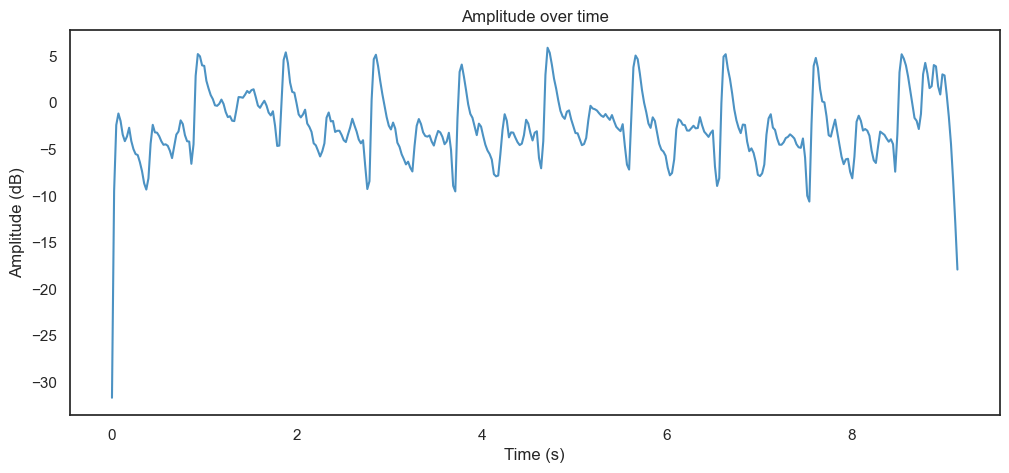

In [59]:
figure = plot_amplitude(y, sr)
plt.show()

### Spectrum

In [60]:
def plot_spectrum(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    ft = np.abs(librosa.stft(y[:sr], hop_length=sr+1))

    plt.plot(ft)
    plt.title('Spectrum');
    plt.xlabel('Frequency Bin');
    plt.ylabel('Amplitude');

    return fig

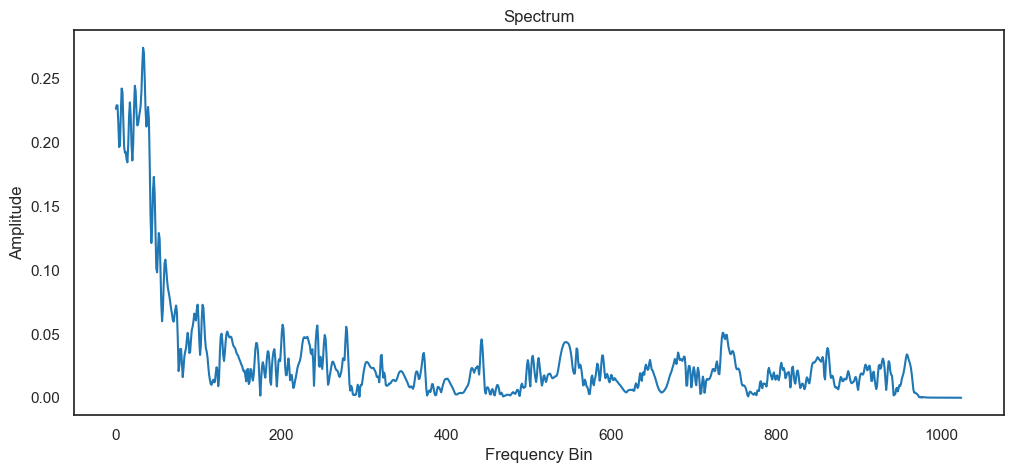

In [62]:
figure = plot_spectrum(y, sr)
plt.show()

### Spectogram

In [63]:
def plot_spectogram(y):
    D = librosa.stft(y)
    dB_scaled_spectogram = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    fig, ax = plt.subplots(figsize=(12,5))
    img = librosa.display.specshow(
        dB_scaled_spectogram,
        x_axis='time',
        y_axis='log',
        ax=ax
    )
    ax.set_title('Spectogram', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')

    return fig

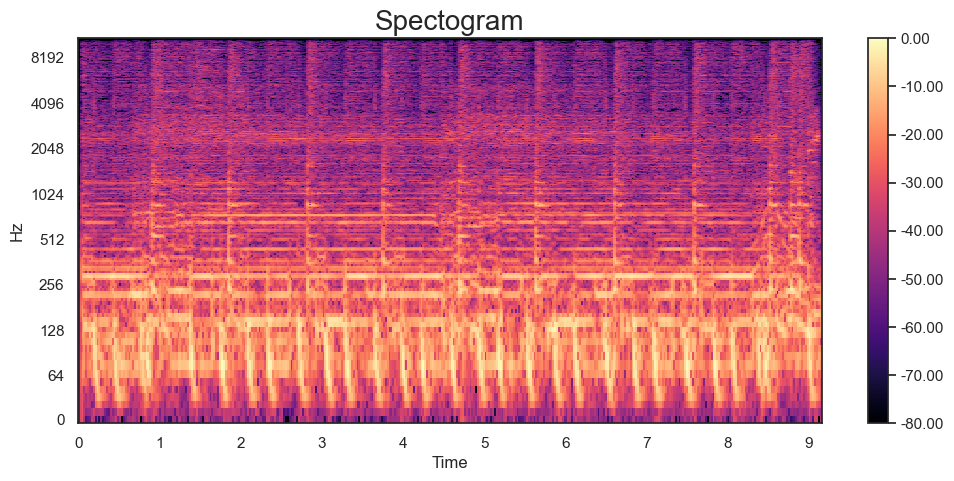

In [64]:
figure = plot_spectogram(y)
plt.show()

### Mel Spectogram

In [65]:
def plot_mel_spectogram(y):
    S = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_mels=128 * 2,
    )
    dB_scaled_spectogram_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    fig, ax = plt.subplots(figsize=(12, 5))
    img = librosa.display.specshow(
        dB_scaled_spectogram_mel,
        x_axis='time',
        y_axis='log',
        ax=ax
    )
    ax.set_title('Mel Spectogram', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')

    return fig

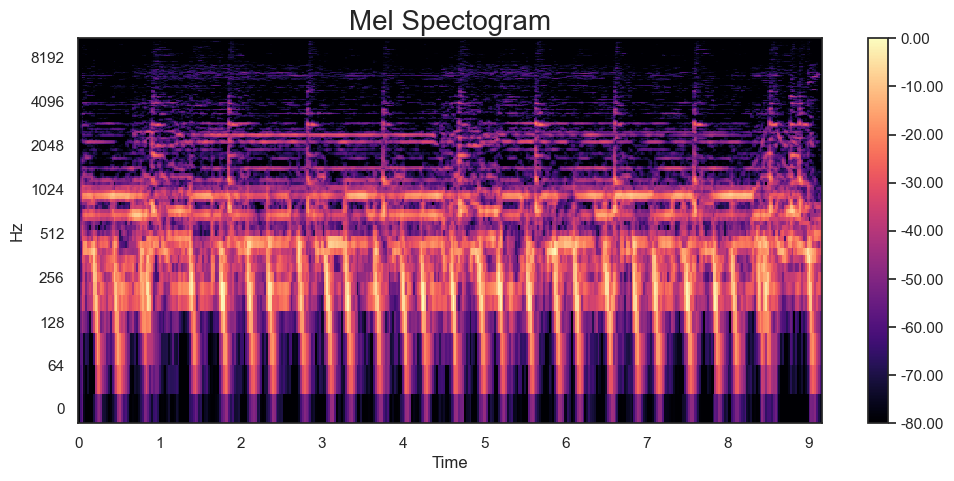

In [66]:
figure = plot_mel_spectogram(y)
plt.show()

### Chroma

In [67]:
def plot_chroma(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Get the chroma feature
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    
    # Plot the chroma feature
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram')

    return fig

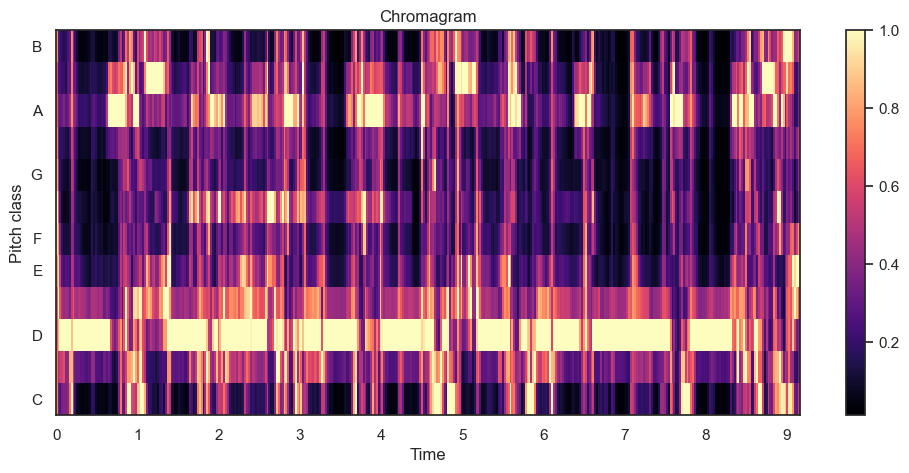

In [68]:
figure = plot_chroma(y, sr)
plt.show()

### MFCCs

In [69]:
def plot_mfccs(y, sr):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Get the mel-frequency cepstral coefficients (MFCCs)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    
    # Plot the MFCCs
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    plt.ylabel('MFCC Coefficients')

    return fig, plot

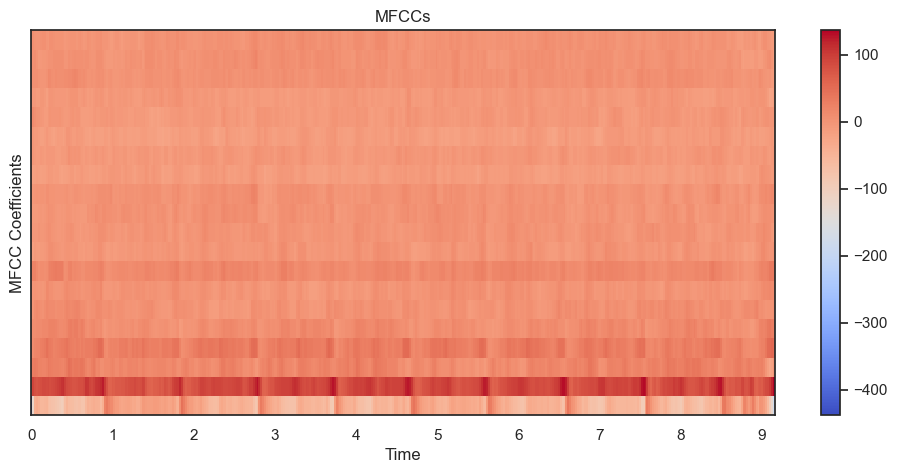

In [70]:
figure = plot_mfccs(y, sr)
plt.show()

## Get data for each audio file and save it to db

### Database connection

In [86]:
import io
import psycopg2
from psycopg2 import sql
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [87]:
# DATABASE CONNECTION 
HOST = "localhost"
DATABASE = "audio"
USER = "postgres"
PASSWORD = "postgres"

In [88]:
conn = psycopg2.connect(
    host=HOST,
    database=DATABASE,
    user=USER,
    password=PASSWORD
)

cursor = conn.cursor()

### Iterate over df

In [89]:
def plot_to_bytes(figure):
    buffer = io.BytesIO()
    FigureCanvas(figure).print_png(buffer)
    return buffer.getvalue()

def clear_fig_memory():
    plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()

In [90]:
batch_size = 25

for id in df.index:
    print(f"Inserting audio analyzed data of id: {id}")
    y, sr = load_audio(df, id)
    
    duration = librosa.get_duration(y=y, sr=sr)
    duration = "{:.3f}".format(duration)
    
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    tempo = "{:.3f}".format(tempo)

    figure = plot_raw_audio(y)
    raw_audio_bytes = plot_to_bytes(figure)
    raw_audio_bytes = psycopg2.Binary(raw_audio_bytes)
    clear_fig_memory()
    
    figure = plot_spectrum(y, sr)
    spectrum_bytes = plot_to_bytes(figure)
    spectrum_bytes = psycopg2.Binary(spectrum_bytes)
    clear_fig_memory()
    
    figure = plot_spectogram(y)
    spectogram_bytes = plot_to_bytes(figure)
    spectogram_bytes = psycopg2.Binary(spectogram_bytes)
    clear_fig_memory()
    
    figure = plot_mel_spectogram(y)
    mel_spectogram_bytes = plot_to_bytes(figure)
    mel_spectogram_bytes = psycopg2.Binary(mel_spectogram_bytes)
    clear_fig_memory()
    
    figure = plot_chroma(y, sr)
    chroma_bytes = plot_to_bytes(figure)
    chroma_bytes = psycopg2.Binary(chroma_bytes)
    clear_fig_memory()
    
    plt.close('all')

    insert_query = sql.SQL("""
        INSERT INTO audio_analysed_data 
        (audio_data_id, duration, tempo, raw_audio_plot, amplitude_plot, spectogram_plot, mel_spectogram_plot, chroma_plot)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
    """)

    cursor.execute(insert_query, (id, duration, tempo, raw_audio_bytes, spectrum_bytes, spectogram_bytes, mel_spectogram_bytes, chroma_bytes))

    if id % batch_size == 0:
        print(f"BATCH PROCESSED, COMMITING! id: {id}")
        conn.commit()
        
conn.commit()

Inserting audio analyzed data of id: 1
Inserting audio analyzed data of id: 2
Inserting audio analyzed data of id: 3
Inserting audio analyzed data of id: 4
Inserting audio analyzed data of id: 5
Inserting audio analyzed data of id: 6
Inserting audio analyzed data of id: 7
Inserting audio analyzed data of id: 8
Inserting audio analyzed data of id: 9
Inserting audio analyzed data of id: 10
Inserting audio analyzed data of id: 11
Inserting audio analyzed data of id: 12
Inserting audio analyzed data of id: 13
Inserting audio analyzed data of id: 14
Inserting audio analyzed data of id: 15
Inserting audio analyzed data of id: 16
Inserting audio analyzed data of id: 17
Inserting audio analyzed data of id: 18
Inserting audio analyzed data of id: 19
Inserting audio analyzed data of id: 20
Inserting audio analyzed data of id: 21
Inserting audio analyzed data of id: 22
Inserting audio analyzed data of id: 23
Inserting audio analyzed data of id: 24
Inserting audio analyzed data of id: 25
BATCH PRO

In [85]:
cursor.close()
conn.close()

## Credits

A lot of stuff is based on: https://www.kaggle.com/code/robikscube/working-with-audio-in-python/notebook

In [84]:
import gc
gc.collect()

113162